In [16]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

데이터 전처리

In [17]:
# mnist - 이미지가 숫자로 변형된 데이터불러오기
(train_data,train_label),(test_data,test_label) = keras.datasets.fashion_mnist.load_data()

print(train_data[:2])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [18]:
train_data.shape

(60000, 28, 28)

웹에서 파일다운받아 숫자변환

In [19]:
# 1. 웹에서 다운 2.파일 불러오기 3.파일숫자변환
with open('b1.jpg','rb') as file:
    img = Image.open(file)
    # 흑백파일 변경
    img = img.convert('L')
    img = img.resize((28,28))
    ex_data = np.array(img)
 

In [20]:
ex_data.shape

(28, 28)

In [21]:
# 3차원 행렬로 변환
ex_data = ex_data.reshape(-1,28,28,1)
ex_data.shape

(1, 28, 28, 1)

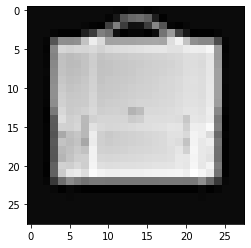

In [33]:
# 가방 이미지 출력
plt.imshow(ex_data[0],cmap='gray_r')
plt.show()

In [22]:
# 3차원 데이터 변환
train_scaled = train_data.reshape(-1,28,28,1)
train_scaled.shape

(60000, 28, 28, 1)

In [23]:
test_scaled = test_data.reshape(-1,28,28,1)
test_scaled.shape

(10000, 28, 28, 1)

In [24]:
# 0-255까지의 숫자 -> 0-1의 값으로 변경
train_scaled = train_scaled/255
train_scaled[0]
test_scaled = test_scaled/255  

In [25]:
sub_data,val_data,sub_label,val_label = train_test_split(train_scaled,train_label)
sub_data.shape,val_data.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

딥러닝 시작부분
* input_shape : 크기 설정
* label : 1차원 행렬

In [26]:
# 합성곱 신경망 선언
model = keras.Sequential()

# CNN
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))

# CNN - 1회 반복
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))


In [28]:
# 인공신경망의 선언
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

딥러닝 설정

In [29]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
check_cb = keras.callbacks.ModelCheckpoint('cnn-test.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

딥러닝 훈련

In [31]:
history = model.fit(sub_data,sub_label,epochs=15,batch_size=64,\
    validation_data=(val_data,val_label),callbacks=[check_cb,early_cb])

Epoch 1/15
704/704 [==============================] - 18s 25ms/step - loss: 0.9371 - accuracy: 0.6736 - val_loss: 0.6157 - val_accuracy: 0.7795
Epoch 2/15
704/704 [==============================] - 17s 25ms/step - loss: 0.5855 - accuracy: 0.7904 - val_loss: 0.4573 - val_accuracy: 0.8395
Epoch 3/15
704/704 [==============================] - 17s 24ms/step - loss: 0.5030 - accuracy: 0.8202 - val_loss: 0.4193 - val_accuracy: 0.8498
Epoch 4/15
704/704 [==============================] - 16s 23ms/step - loss: 0.4576 - accuracy: 0.8394 - val_loss: 0.4041 - val_accuracy: 0.8515
Epoch 5/15
704/704 [==============================] - 16s 23ms/step - loss: 0.4306 - accuracy: 0.8489 - val_loss: 0.3685 - val_accuracy: 0.8659
Epoch 6/15
704/704 [==============================] - 17s 24ms/step - loss: 0.4081 - accuracy: 0.8562 - val_loss: 0.3489 - val_accuracy: 0.8763
Epoch 7/15
704/704 [==============================] - 16s 23ms/step - loss: 0.3892 - accuracy: 0.8643 - val_loss: 0.3385 - val_accuracy:

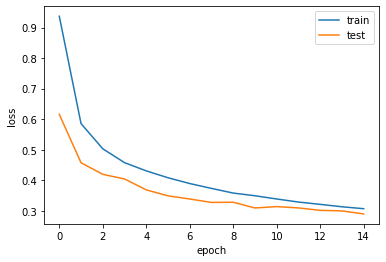

In [34]:
# train_data,test_data loss 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [35]:
# 정확도
score = model.evaluate(val_data,val_label)
print("loss, accuracy : ",score)

469/469 [==============================] - 2s 4ms/step - loss: 0.2897 - accuracy: 0.8941
loss, accuracy :  [0.28968358039855957, 0.8940666913986206]


test_data 1개를 예측

In [36]:
# 예측 - 10개의 데이터 확률
results = model.predict(val_data[0:1])
print(results) # 

1/1 [==============================] - 0s 76ms/step
[[6.9783731e-05 1.3321009e-07 1.1642824e-02 3.5655710e-05 2.2653226e-02
  5.9606924e-07 9.6556747e-01 3.0548897e-08 2.9365745e-05 8.6581787e-07]]


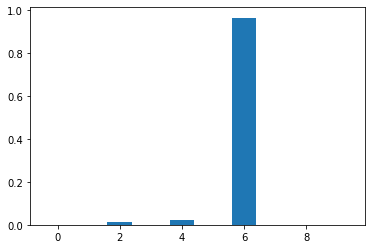

In [41]:
plt.bar(range(0,10),results[0])
plt.show()

In [39]:
# 0-티셔츠,1-바지,2-스웨터,3-드레스,4-코트,5-샌달,6-셔츠,7-스니커즈,8-가방,9-앵클 부츠
classes = ['티셔츠','바지','스웨터','드레스','코트',
           '샌달','셔츠','스니커즈','가방','앵클 부츠']

In [40]:
# np.argmax(results) -> 가장작은 값의 index
classes[np.argmax(results)]

'셔츠'

### [퀴즈] b1.jpg 예측

In [43]:
# b1.jpg 예측 - 10개의 데이터 확률
results2 = model.predict(ex_data)
print(results) # 

1/1 [==============================] - 0s 54ms/step
[[6.9783731e-05 1.3321009e-07 1.1642824e-02 3.5655710e-05 2.2653226e-02
  5.9606924e-07 9.6556747e-01 3.0548897e-08 2.9365745e-05 8.6581787e-07]]


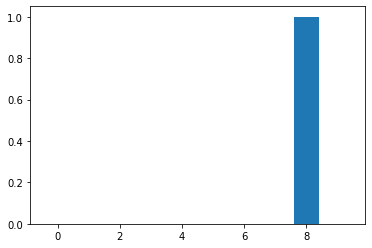

In [45]:
plt.bar(range(0,10),results2[0])
plt.show()

In [46]:
# np.argmax(results) -> 가장작은 값의 index
classes[np.argmax(results2)]

'가방'